# Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def df_processing(df):
    # correct_perfect: 498, 499, 500
    df['correct_perfect'] = False
    df.loc[df['Change Points'] == "[499]", 'correct_perfect'] = True
    df.loc[df['Change Points'] == "[498]", 'correct_perfect'] = True
    df.loc[df['Change Points'] == "[500]", 'correct_perfect'] = True
    
    # correct partial: result include 498, 499, 500, it might include other change points.
    df['correct_partial_499'] = df["Change Points"].str.count("499")
    df['correct_partial_498'] = df["Change Points"].str.count("498")
    df['correct_partial_500'] = df["Change Points"].str.count("500")
    df['correct_partial'] = df['correct_partial_499'] + df['correct_partial_498'] + df['correct_partial_500']
    
    # the number of change points
    df['the number of detected change points'] = df["Change Points"].str.count(",") + 1
    
    # group name
    df["group"] = "rho: " + df["rho"].astype(str) + " , SNR: " + df["SNR"].astype(str)
    
    return df

def accuracy_table(df, sort = False):
    n_sample = df.groupby("group").count()["Repitition"].unique()
    df_count = df[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
    df_count["accuracy_perfect"] = df_count["correct_perfect"]/n_sample
    df_count["accuracy_partial"] = df_count["correct_partial"]/n_sample
    
    if sort:
        df_count=df_count.sort_values("accuracy_partial", ascending=False)
    return df_count

def number_cps_plot(df, name):
    fig, ax = plt.subplots(5, 3, figsize=(15, 15))
    for g, ax in zip(group_list, ax.ravel()):
        labels, counts = np.unique(df.loc[df["group"] == g, "the number of detected change points"].values, return_counts = True)
        ax.bar(labels, counts , alpha = 0.7)
        ax.set_title(g)
        ax.set_xlim(-0.5, 5.5)
        ax.locator_params(axis = "x", integer = True)
        
    fig.tight_layout()
    fig.suptitle("Estimated number of change points: " + name, fontsize=20).set_y(1.02)
    plt.show()

group_list = np.array(['rho: 0.0 , SNR: 6.0', 'rho: 0.3 , SNR: 6.0',
       'rho: 0.7 , SNR: 6.0', 'rho: 0.0 , SNR: 3.52',
       'rho: 0.3 , SNR: 3.52', 'rho: 0.7 , SNR: 3.52',
       'rho: 0.0 , SNR: 2.07', 'rho: 0.3 , SNR: 2.07',
       'rho: 0.7 , SNR: 2.07', 'rho: 0.0 , SNR: 1.22',
       'rho: 0.3 , SNR: 1.22', 'rho: 0.7 , SNR: 1.22',
       'rho: 0.0 , SNR: 0.71', 'rho: 0.3 , SNR: 0.71',
       'rho: 0.7 , SNR: 0.71'])

# Our proposed methods

In [3]:
df = pd.read_csv('results/simulation_five_variate_20230321.csv')
df = df_processing(df)
df

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial_499,correct_partial_498,correct_partial_500,correct_partial,the number of detected change points,group
0,6,386.690022,0.0,6.00,1000,0.000000,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
1,3,464.571500,0.0,6.00,1000,0.000000,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
2,5,465.427833,0.0,6.00,1000,0.153970,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
3,2,465.880617,0.0,6.00,1000,0.168152,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
4,7,465.965340,0.0,6.00,1000,0.154327,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,497,440.471484,0.7,0.71,1000,0.431827,"[462, 471, 534, 714]",False,0,0,0,0,4,"rho: 0.7 , SNR: 0.71"
7496,498,429.443668,0.3,0.71,1000,0.321422,"[527, 536]",False,0,0,0,0,2,"rho: 0.3 , SNR: 0.71"
7497,499,429.414737,0.3,0.71,1000,0.328125,[499],True,1,0,0,1,1,"rho: 0.3 , SNR: 0.71"
7498,498,424.631574,0.7,0.71,1000,0.393311,"[68, 479, 485, 495, 499]",False,1,0,0,1,5,"rho: 0.7 , SNR: 0.71"


In [4]:
df_count = accuracy_table(df)
df_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,99,134,0.198,0.268
1,0.0,1.22,1000,150,187,0.300,0.374
2,0.0,2.07,1000,256,282,0.512,0.564
3,0.0,3.52,1000,354,362,0.708,0.724
4,0.0,6.00,1000,458,462,0.916,0.924
5,0.3,0.71,1000,71,134,0.142,0.268
6,0.3,1.22,1000,148,219,0.296,0.438
7,0.3,2.07,1000,196,252,0.392,0.504
8,0.3,3.52,1000,292,329,0.584,0.658
9,0.3,6.00,1000,414,422,0.828,0.844


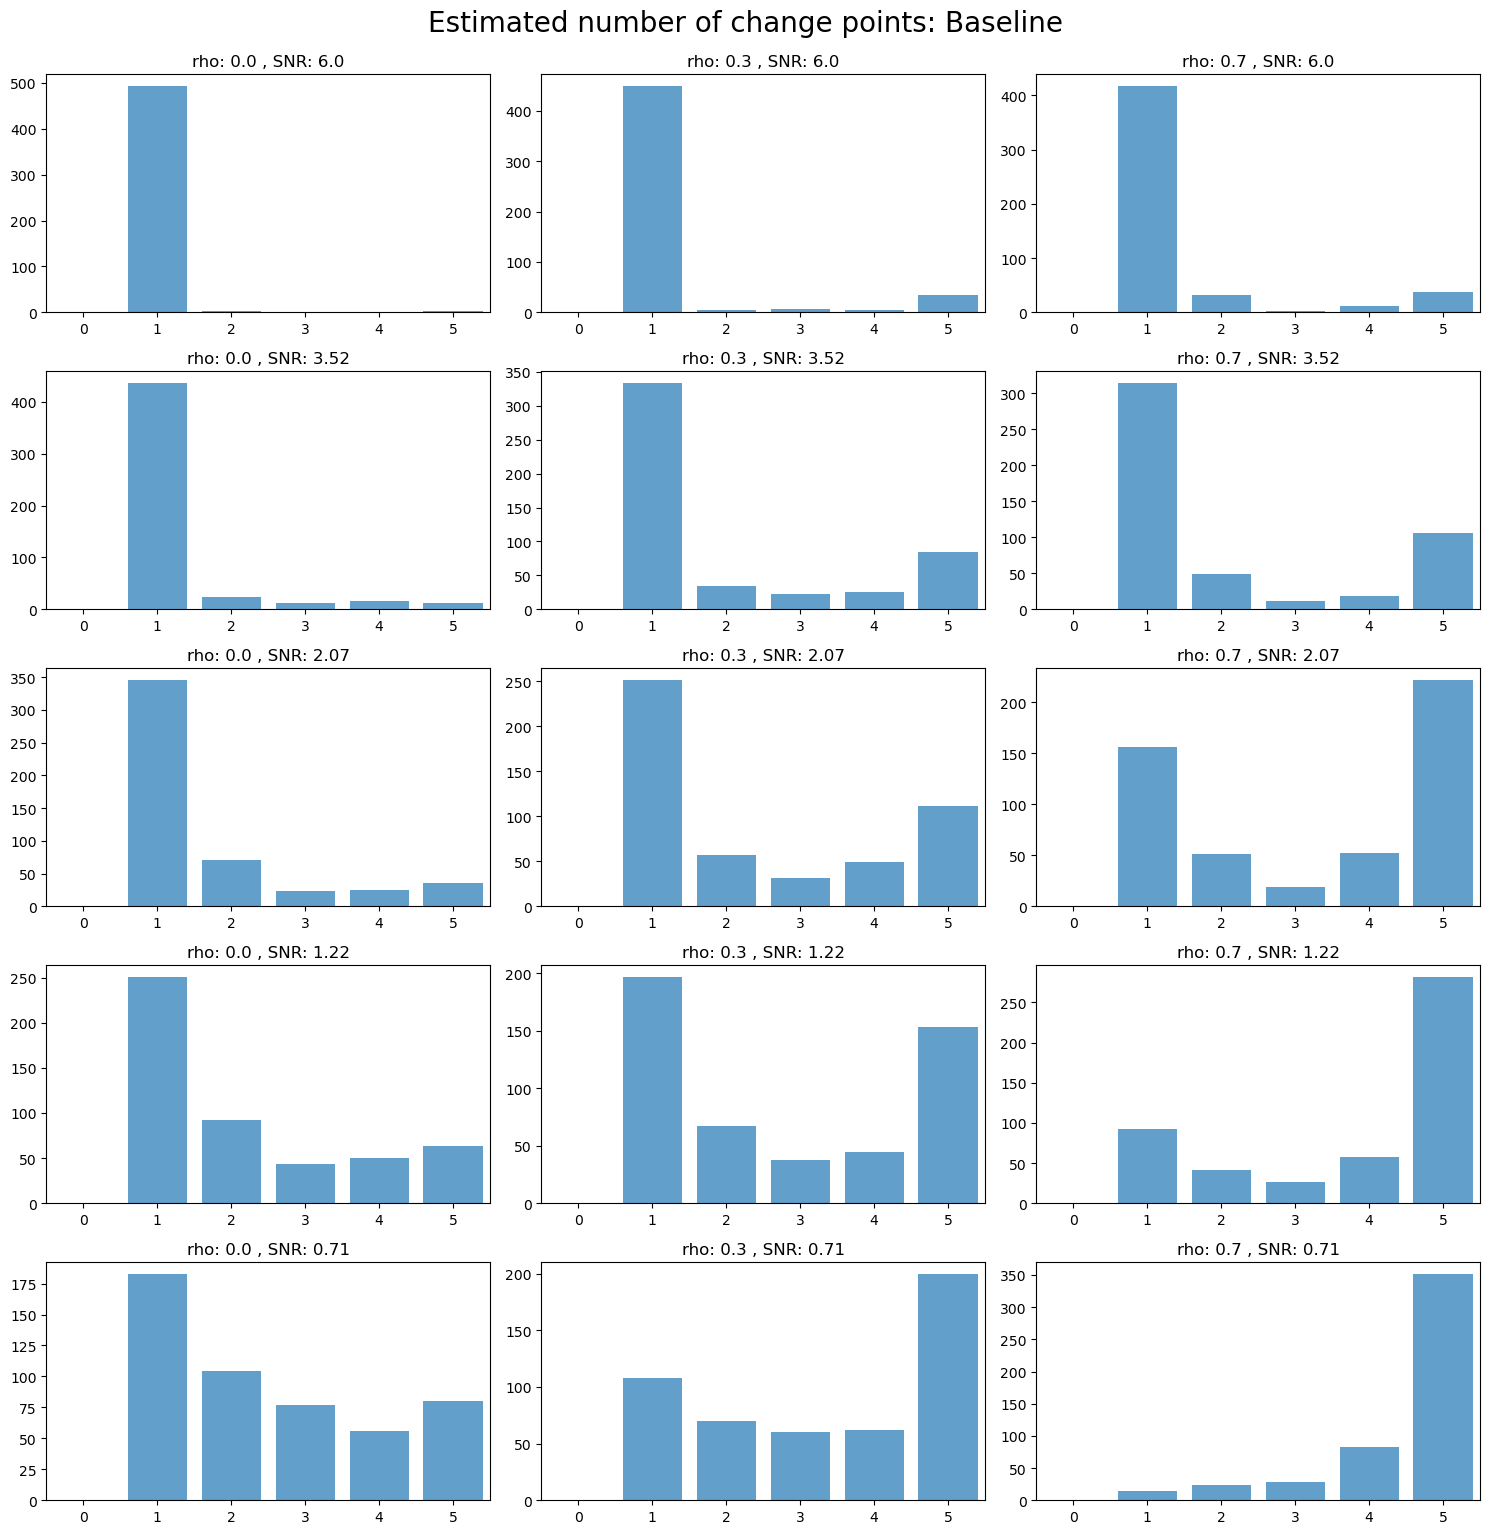

In [5]:
number_cps_plot(df, "Baseline")

# Our proposed methods: quadratic penalty

In [6]:
df_quad = pd.read_csv('results/simulation_five_variate_quadratic_penalty_20230429.csv')
df_quad = df_processing(df_quad)
df_quad

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial_499,correct_partial_498,correct_partial_500,correct_partial,the number of detected change points,group
0,0,444.168769,0.0,6.00,1000,0.866193,[],False,0,0,0,0,1,"rho: 0.0 , SNR: 6.0"
1,0,448.369987,0.3,6.00,1000,0.549420,"[494, 506, 898]",False,0,0,0,0,3,"rho: 0.3 , SNR: 6.0"
2,0,449.259993,0.7,6.00,1000,0.884346,[],False,0,0,0,0,1,"rho: 0.7 , SNR: 6.0"
3,0,448.113686,0.0,3.52,1000,0.146673,[498],True,0,1,0,1,1,"rho: 0.0 , SNR: 3.52"
4,0,448.359044,0.3,3.52,1000,0.826816,[],False,0,0,0,0,1,"rho: 0.3 , SNR: 3.52"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,495,437.913422,0.7,0.71,1000,0.328537,"[499, 514]",False,1,0,0,1,2,"rho: 0.7 , SNR: 0.71"
7496,497,437.632818,0.7,0.71,1000,0.291916,[499],True,1,0,0,1,1,"rho: 0.7 , SNR: 0.71"
7497,498,435.656108,0.7,0.71,1000,0.331787,"[499, 822]",False,1,0,0,1,2,"rho: 0.7 , SNR: 0.71"
7498,496,435.326580,0.7,0.71,1000,0.452836,"[386, 736]",False,0,0,0,0,2,"rho: 0.7 , SNR: 0.71"


In [7]:
df_count_quad = accuracy_table(df_quad)
df_count_quad

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,48,94,0.096,0.188
1,0.0,1.22,1000,152,236,0.304,0.472
2,0.0,2.07,1000,318,361,0.636,0.722
3,0.0,3.52,1000,419,431,0.838,0.862
4,0.0,6.00,1000,467,468,0.934,0.936
5,0.3,0.71,1000,12,29,0.024,0.058
6,0.3,1.22,1000,33,63,0.066,0.126
7,0.3,2.07,1000,77,143,0.154,0.286
8,0.3,3.52,1000,171,245,0.342,0.490
9,0.3,6.00,1000,241,320,0.482,0.640


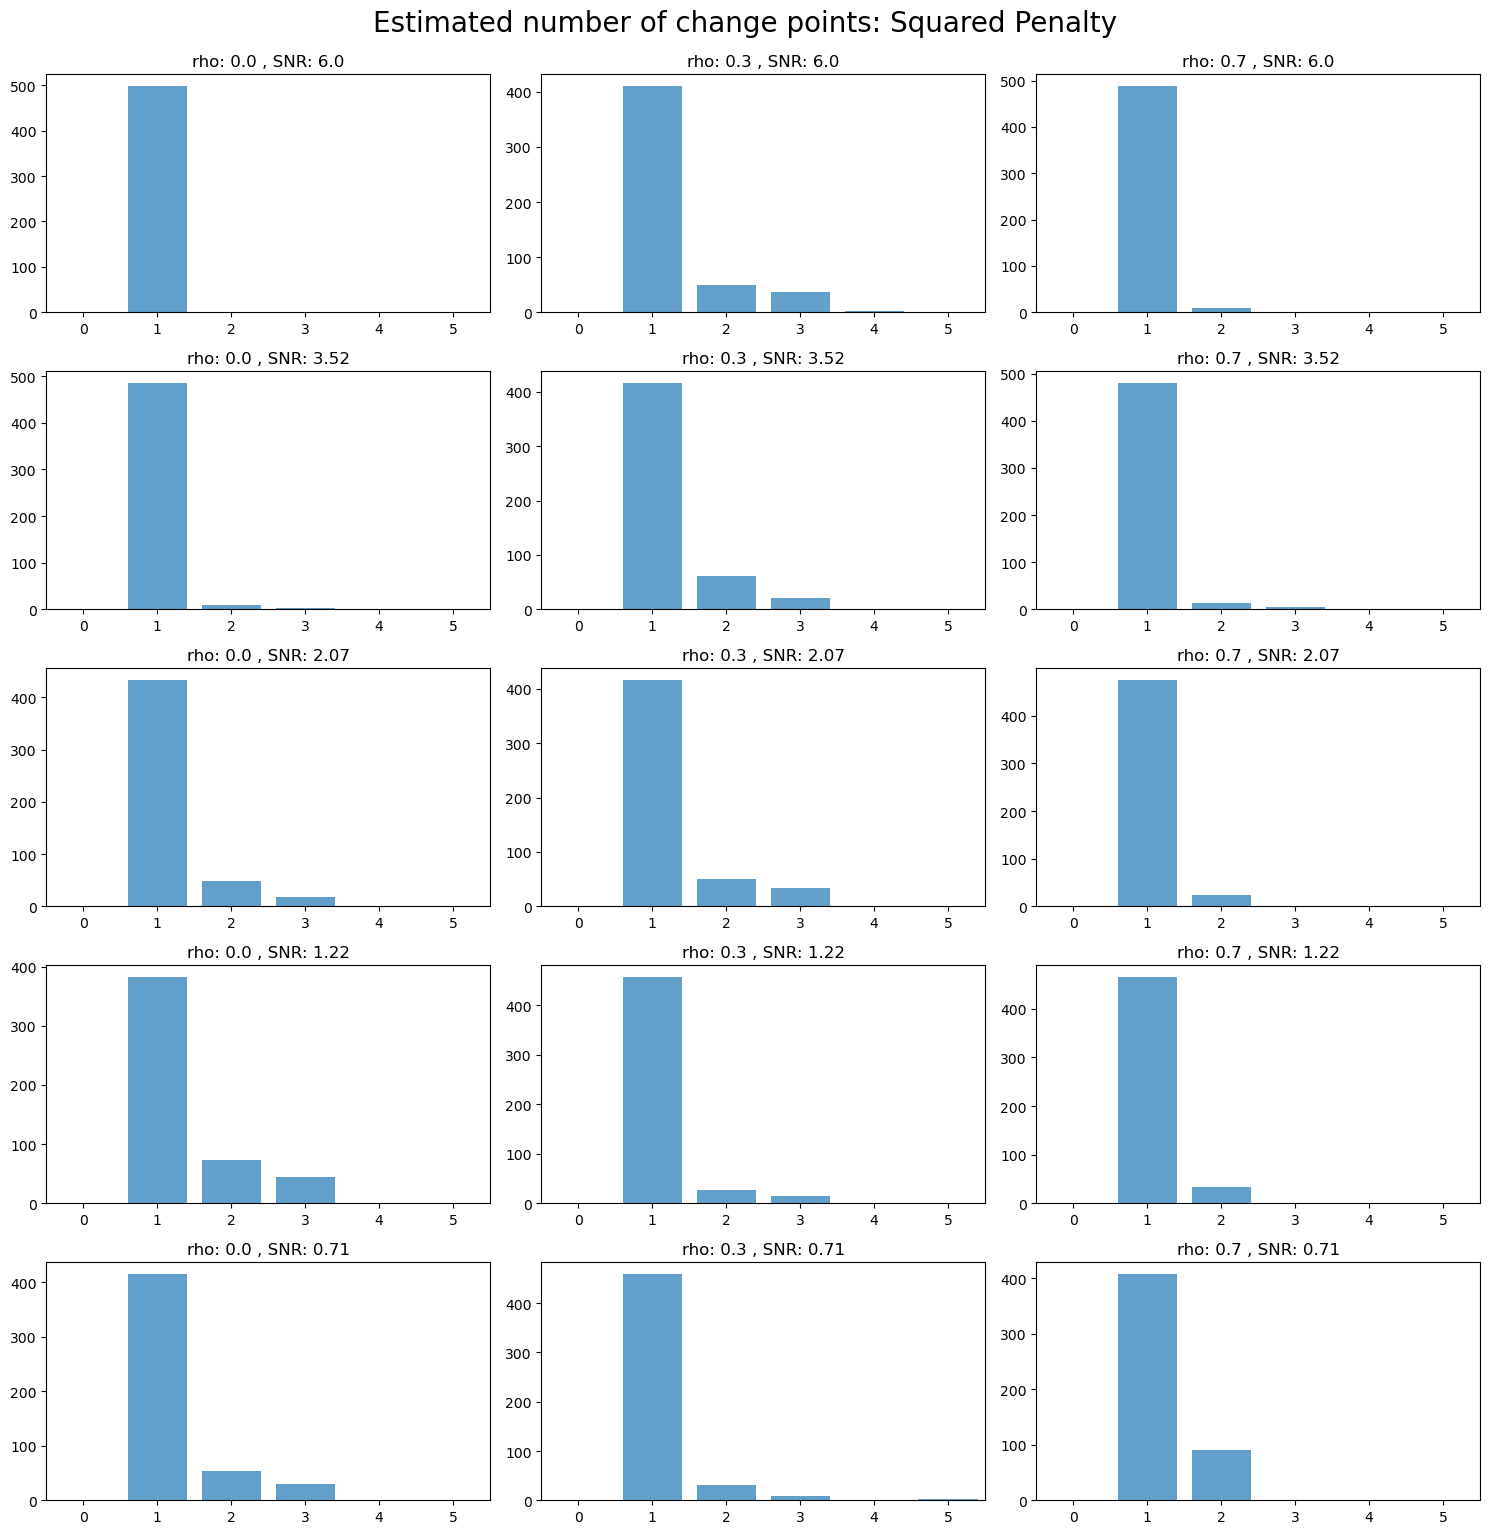

In [8]:
number_cps_plot(df_quad, "Squared Penalty")

# Our proposed methods: squared BigM

In [9]:
df_sqBigM = pd.read_csv('results/simulation_five_variate_squared_bigM_20230504.csv')
df_sqBigM = df_processing(df_sqBigM)
df_sqBigM

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial_499,correct_partial_498,correct_partial_500,correct_partial,the number of detected change points,group
0,0,429.520446,0.0,6.00,1000,0.891009,"[39, 140, 968]",False,0,0,0,0,3,"rho: 0.0 , SNR: 6.0"
1,0,431.832278,0.3,6.00,1000,0.408385,[499],True,1,0,0,1,1,"rho: 0.3 , SNR: 6.0"
2,0,431.928070,0.7,6.00,1000,0.485914,[500],True,0,0,1,1,1,"rho: 0.7 , SNR: 6.0"
3,0,432.113854,0.0,3.52,1000,0.397695,[498],True,0,1,0,1,1,"rho: 0.0 , SNR: 3.52"
4,0,432.433904,0.3,3.52,1000,0.409954,[499],True,1,0,0,1,1,"rho: 0.3 , SNR: 3.52"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,496,433.679098,0.7,0.71,1000,0.196614,"[3, 368, 376, 499, 670]",False,1,0,0,1,5,"rho: 0.7 , SNR: 0.71"
7496,497,421.371242,0.7,0.71,1000,0.174268,"[19, 499, 920]",False,1,0,0,1,3,"rho: 0.7 , SNR: 0.71"
7497,498,421.445217,0.7,0.71,1000,0.217831,"[74, 498]",False,0,1,0,1,2,"rho: 0.7 , SNR: 0.71"
7498,499,421.422608,0.7,0.71,1000,0.209654,"[439, 499, 604, 818, 942]",False,1,0,0,1,5,"rho: 0.7 , SNR: 0.71"


In [10]:
df_count_sqBigM = accuracy_table(df_sqBigM)
df_count_sqBigM

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,11,33,0.022,0.066
1,0.0,1.22,1000,101,141,0.202,0.282
2,0.0,2.07,1000,181,188,0.362,0.376
3,0.0,3.52,1000,279,286,0.558,0.572
4,0.0,6.00,1000,316,326,0.632,0.652
5,0.3,0.71,1000,10,28,0.020,0.056
6,0.3,1.22,1000,39,74,0.078,0.148
7,0.3,2.07,1000,126,156,0.252,0.312
8,0.3,3.52,1000,250,258,0.500,0.516
9,0.3,6.00,1000,254,257,0.508,0.514


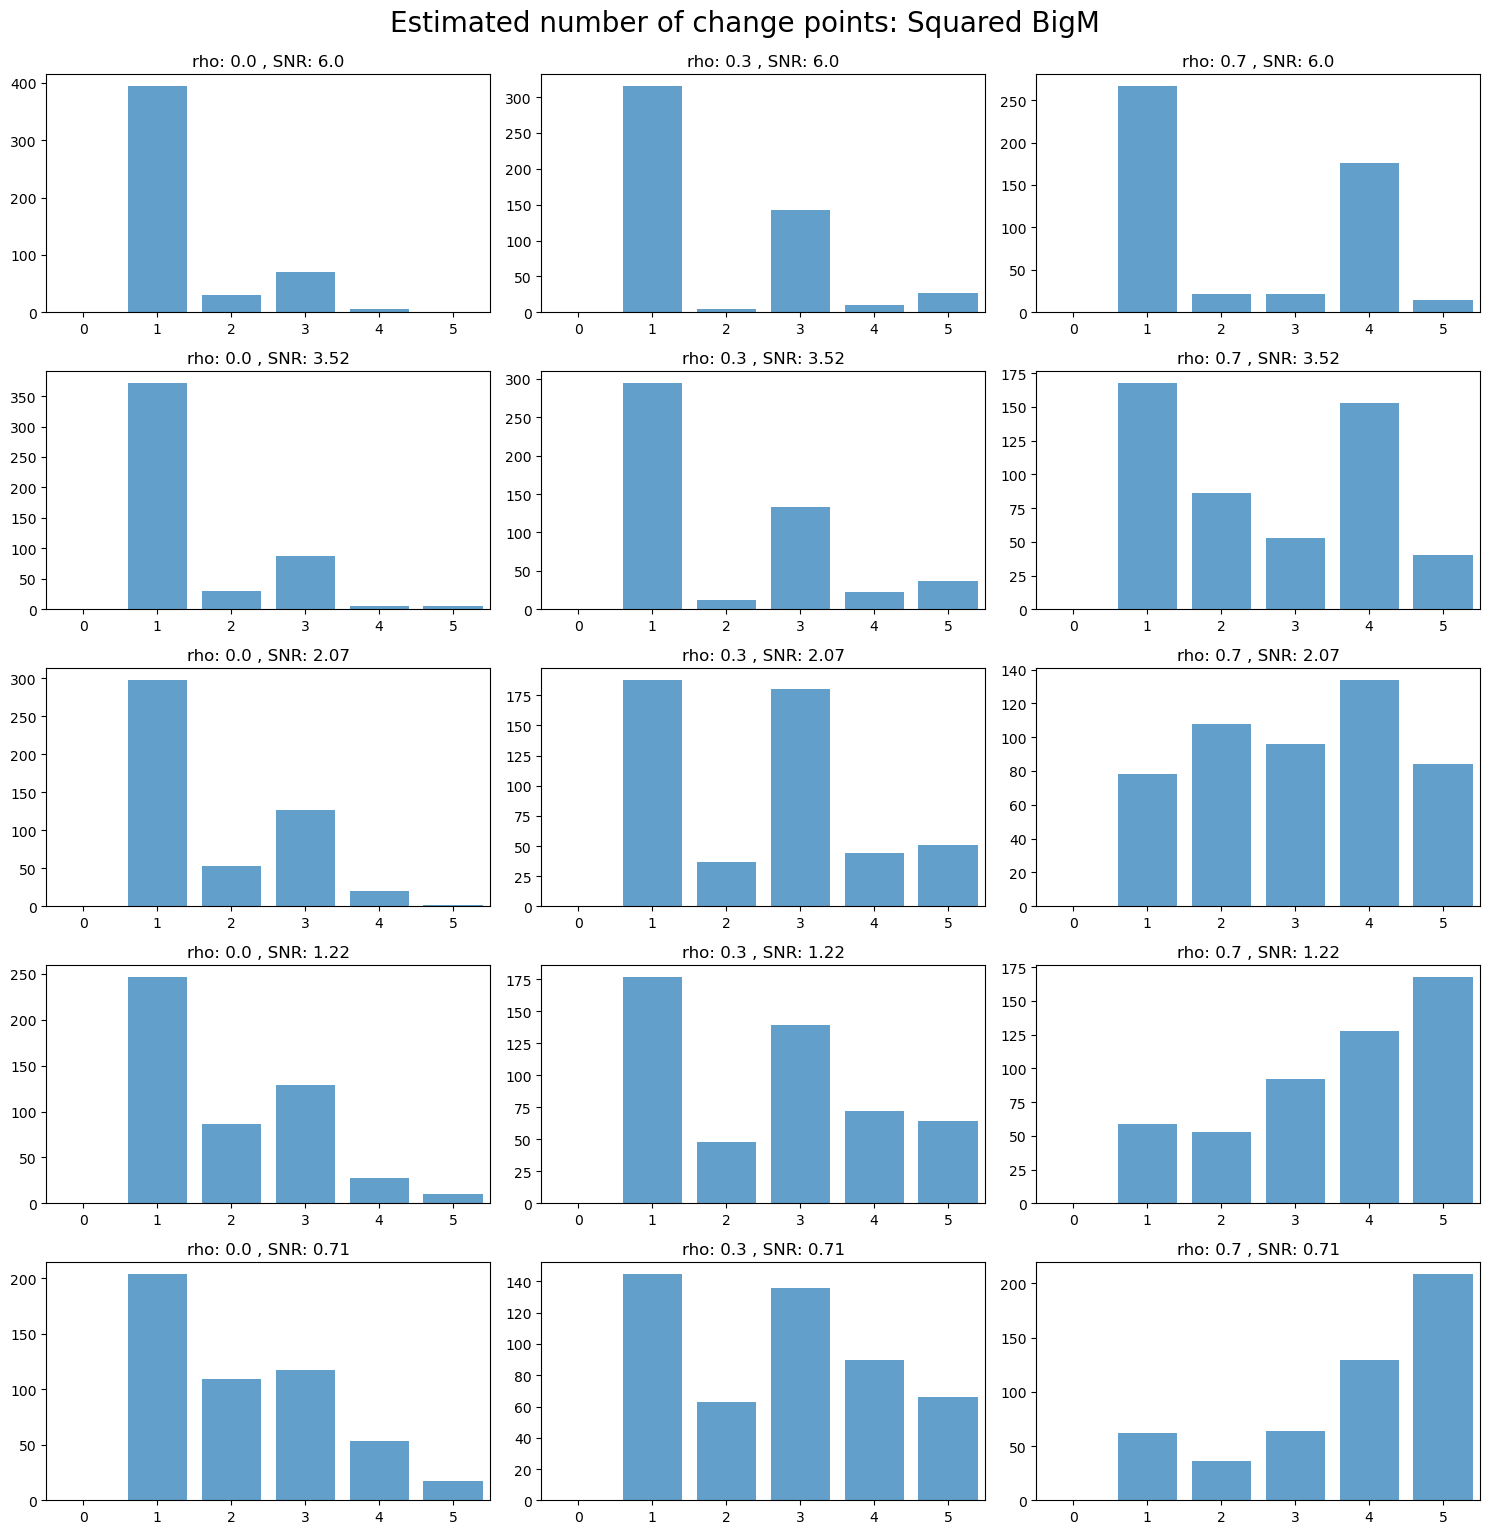

In [11]:
number_cps_plot(df_sqBigM, "Squared BigM")

# Our proposed methods: l2 regularization

In [12]:
df_reg = pd.read_csv('results/simulation_five_variate_l2_reg_20230508.csv')
df_reg = df_processing(df_reg)
df_reg

,Repitition,Time,rho,SNR,n,Optimality Gap,Change Points,correct_perfect,correct_partial_499,correct_partial_498,correct_partial_500,correct_partial,the number of detected change points,group
0,6,389.600252,0.0,6.00,1000,0.000000,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
1,0,471.642053,0.0,6.00,1000,0.071262,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
2,7,471.865008,0.0,6.00,1000,0.128342,[498],True,0,1,0,1,1,"rho: 0.0 , SNR: 6.0"
3,3,471.916477,0.0,6.00,1000,0.095217,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
4,2,472.039211,0.0,6.00,1000,0.097696,[499],True,1,0,0,1,1,"rho: 0.0 , SNR: 6.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,497,441.127204,0.7,0.71,1000,0.412199,"[490, 495, 564, 571, 574]",False,0,0,0,0,5,"rho: 0.7 , SNR: 0.71"
7496,498,433.811840,0.3,0.71,1000,0.283677,[499],True,1,0,0,1,1,"rho: 0.3 , SNR: 0.71"
7497,499,433.830783,0.3,0.71,1000,0.307032,[502],False,0,0,0,0,1,"rho: 0.3 , SNR: 0.71"
7498,498,430.479273,0.7,0.71,1000,0.384360,"[499, 570]",False,1,0,0,1,2,"rho: 0.7 , SNR: 0.71"


In [13]:
df_count_reg = accuracy_table(df_reg)
df_count_reg

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,91,119,0.182,0.238
1,0.0,1.22,1000,133,170,0.266,0.340
2,0.0,2.07,1000,212,241,0.424,0.482
3,0.0,3.52,1000,379,384,0.758,0.768
4,0.0,6.00,1000,465,465,0.930,0.930
5,0.3,0.71,1000,77,135,0.154,0.270
6,0.3,1.22,1000,152,197,0.304,0.394
7,0.3,2.07,1000,220,265,0.440,0.530
8,0.3,3.52,1000,286,307,0.572,0.614
9,0.3,6.00,1000,426,433,0.852,0.866


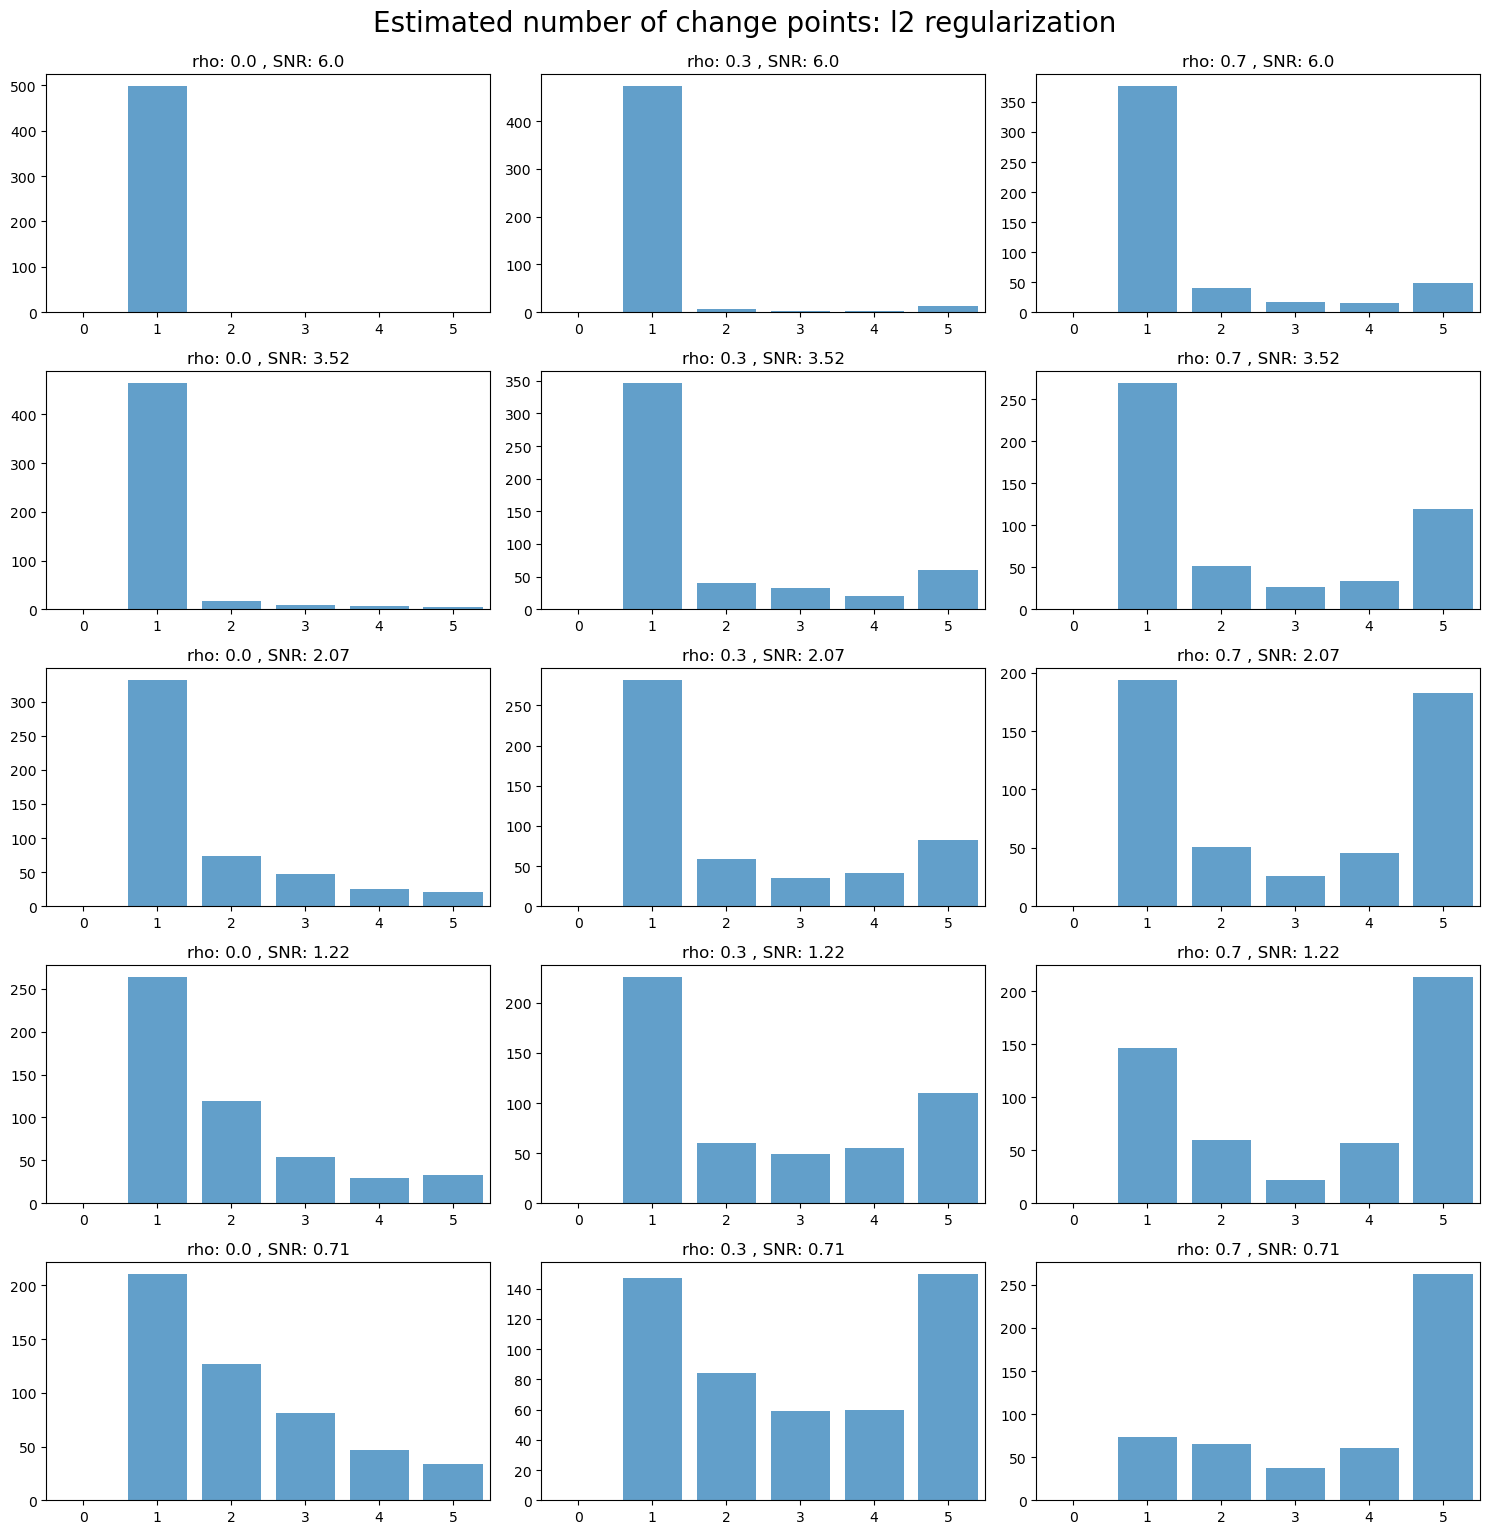

In [14]:
number_cps_plot(df_reg, "l2 regularization")

# Benchmarks: Bai and Perron

In [15]:
df_BP= pd.read_csv('results/simulation_five_variate_benchmark_BP_20230408.csv')

# correct_perfect: detect only 499
df_BP['correct_perfect'] = False
df_BP.loc[df_BP['Location of CP'] == "[500, 1000]", 'correct_perfect'] = True
df_BP.loc[df_BP['Location of CP'] == "[499, 1000]", 'correct_perfect'] = True
df_BP.loc[df_BP['Location of CP'] == "[501, 1000]", 'correct_perfect'] = True

# correct partial: result include 499, it might include other change points.
df_BP['correct_partial_500'] = df_BP["Location of CP"].str.count("500")
df_BP['correct_partial_499'] = df_BP["Location of CP"].str.count("499")
df_BP['correct_partial_501'] = df_BP["Location of CP"].str.count("501")

df_BP['correct_partial'] = df_BP['correct_partial_500'] + df_BP['correct_partial_499'] + df_BP['correct_partial_501']

# group name
df_BP["group"] = "rho: " + df_BP["rho"].astype(str) + " , SNR: " + df_BP["SNR"].astype(str)
df_BP

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial_500,correct_partial_499,correct_partial_501,correct_partial,group
0,0,242.878282,0.0,6.00,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0"
1,6,243.477018,0.0,6.00,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0"
2,2,245.595690,0.0,6.00,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0"
3,3,245.595745,0.0,6.00,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0"
4,5,245.595867,0.0,6.00,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,498,144.576718,0.3,0.71,1000,1,"[499, 1000]",True,0,1,0,1,"rho: 0.3 , SNR: 0.71"
7496,499,143.618568,0.3,0.71,1000,1,"[501, 1000]",True,0,0,1,1,"rho: 0.3 , SNR: 0.71"
7497,498,129.368120,0.7,0.71,1000,1,"[497, 1000]",False,0,0,0,0,"rho: 0.7 , SNR: 0.71"
7498,497,131.325467,0.7,0.71,1000,1,"[506, 1000]",False,0,0,0,0,"rho: 0.7 , SNR: 0.71"


## Accuracy

Findings:

- Higher SNR, higher accuracy
- HIgher rho, less accuracy relatively
- The estimated nnumber of CPD seems to be 1 for all sampling.

In [16]:
df_BP_count = df_BP[["rho", "SNR", "n", "correct_perfect", "correct_partial"]].groupby(["rho", "SNR", "n"]).sum().reset_index()
df_BP_count["accuracy_perfect"] = df_BP_count["correct_perfect"]/500
df_BP_count["accuracy_partial"] = df_BP_count["correct_partial"]/500
df_BP_count

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
0,0.0,0.71,1000,330,330,0.660,0.660
1,0.0,1.22,1000,386,386,0.772,0.772
2,0.0,2.07,1000,418,418,0.836,0.836
3,0.0,3.52,1000,449,449,0.898,0.898
4,0.0,6.00,1000,475,475,0.950,0.950
5,0.3,0.71,1000,325,325,0.650,0.650
6,0.3,1.22,1000,393,393,0.786,0.786
7,0.3,2.07,1000,418,418,0.836,0.836
8,0.3,3.52,1000,450,450,0.900,0.900
9,0.3,6.00,1000,471,471,0.942,0.942


In [17]:
df_BP_count.sort_values("accuracy_partial", ascending=False)

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial
4,0.0,6.00,1000,475,475,0.950,0.950
14,0.7,6.00,1000,474,474,0.948,0.948
9,0.3,6.00,1000,471,471,0.942,0.942
8,0.3,3.52,1000,450,450,0.900,0.900
3,0.0,3.52,1000,449,449,0.898,0.898
13,0.7,3.52,1000,442,442,0.884,0.884
12,0.7,2.07,1000,423,423,0.846,0.846
2,0.0,2.07,1000,418,418,0.836,0.836
7,0.3,2.07,1000,418,418,0.836,0.836
6,0.3,1.22,1000,393,393,0.786,0.786


## Estimated number of change points

Findings:

- All model detect 1 change point.

In [18]:
df_BP["The number of CP"].unique()

array([1])

## Optimality Gap: the distibution of the estimated location

Findings:

- Smaller SNR, wider range

In [19]:
df_BP['location'] = df_BP["Location of CP"].str[1:4].astype(int)
df_BP.head()

,Repitition,Time,rho,SNR,n,The number of CP,Location of CP,correct_perfect,correct_partial_500,correct_partial_499,correct_partial_501,correct_partial,group,location
0,0,242.878282,0.0,6.0,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0",500
1,6,243.477018,0.0,6.0,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0",500
2,2,245.595690,0.0,6.0,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0",500
3,3,245.595745,0.0,6.0,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0",500
4,5,245.595867,0.0,6.0,1000,1,"[500, 1000]",True,1,0,0,1,"rho: 0.0 , SNR: 6.0",500


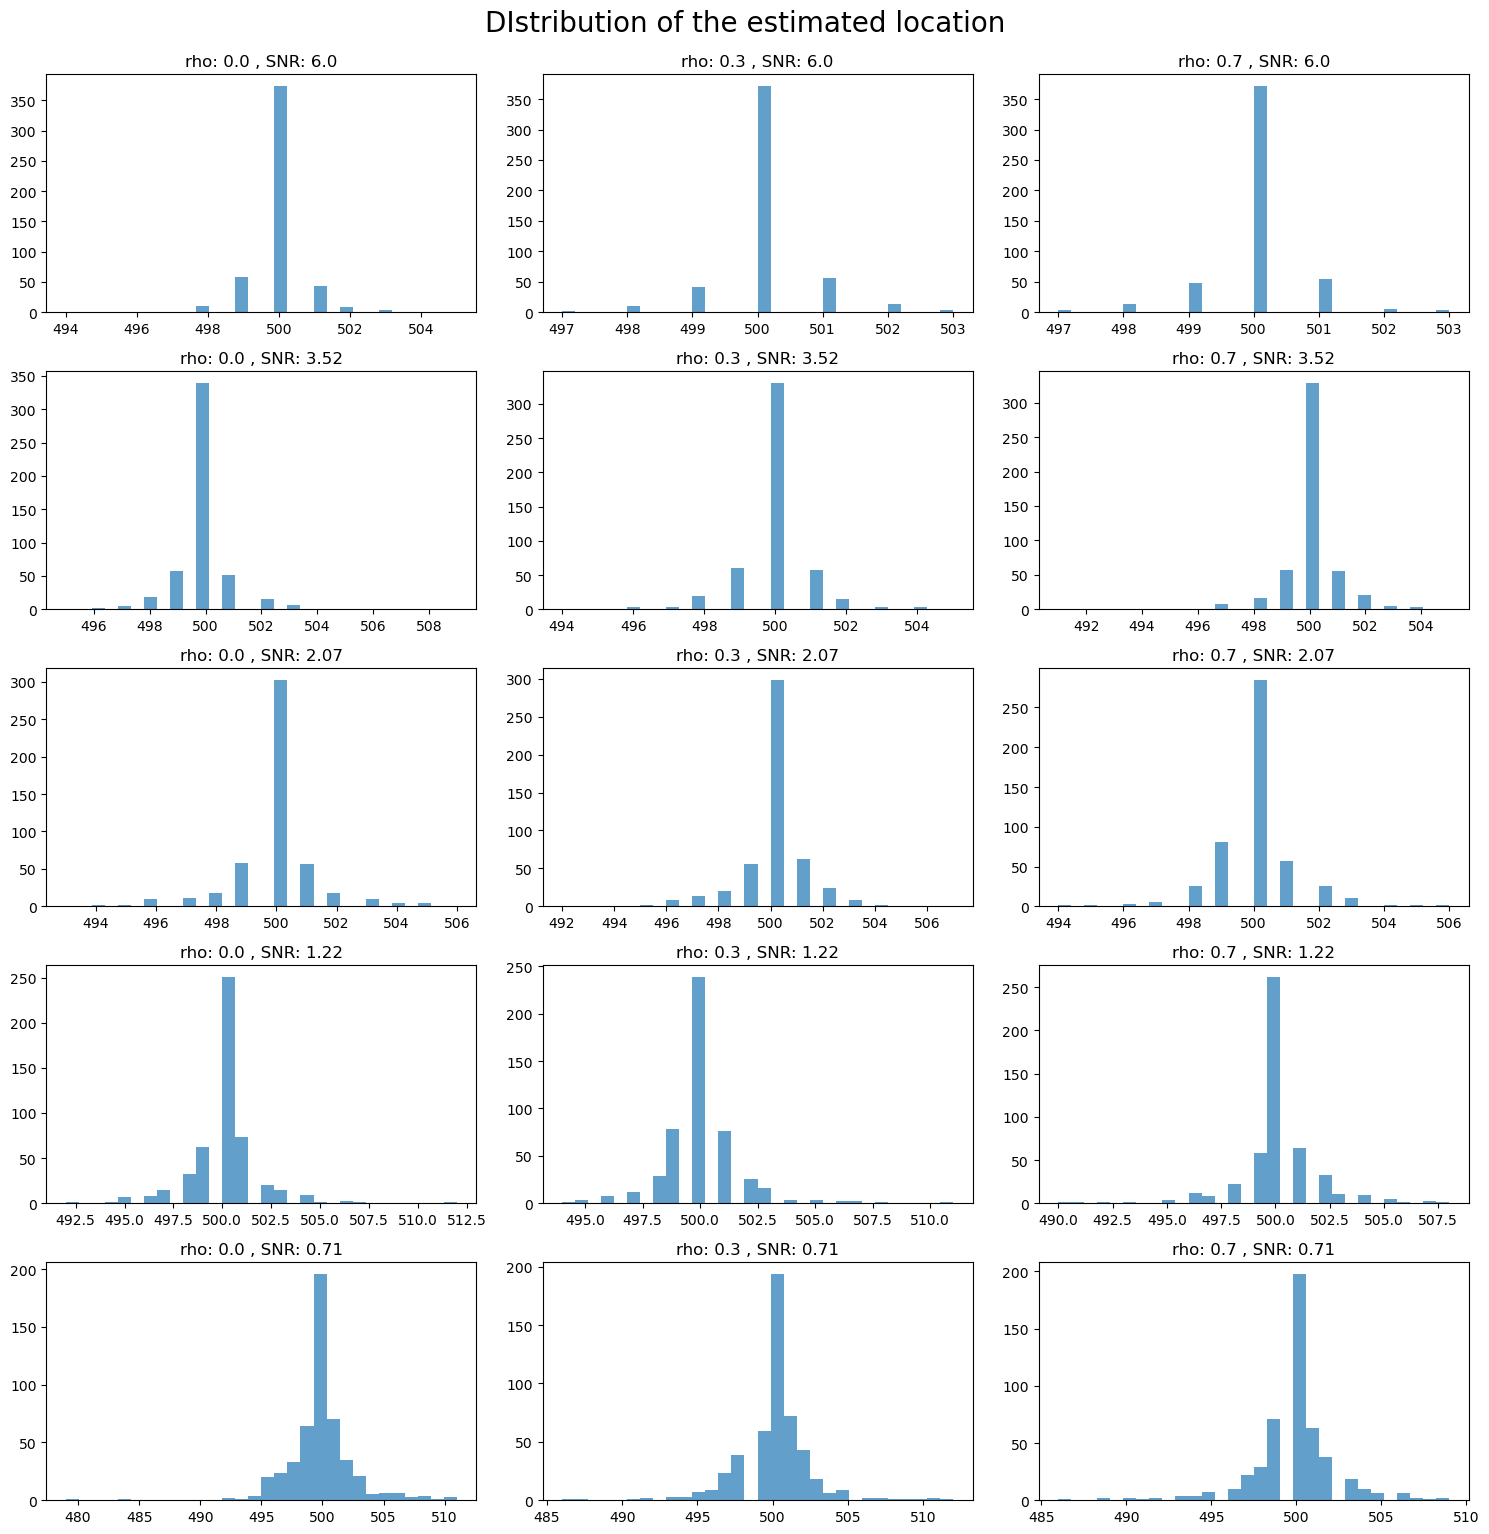

In [20]:
group_list = df_BP["group"].unique()

min_num = df_BP.location.min()
max_num = df_BP.location.max()

fig, ax = plt.subplots(5, 3, figsize=(15, 15))

for g, ax in zip(group_list, ax.ravel()):
    ax.hist(df_BP.loc[df_BP["group"] == g, "location"], alpha = 0.7, bins = 30)
    #ax.set_xticks(np.linspace(480, 520, 5))
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("DIstribution of the estimated location", fontsize=20).set_y(1.02)
plt.show()

# Benchmarks: Bayesian approach

In [21]:
df_bayes_1 = pd.read_csv('results/result_bayes_rho_03_SNR_122_20230416.csv')
df_bayes_2 = pd.read_csv('results/result_bayes_rho_03_SNR_071_20230501.csv')
df_bayes = pd.concat([df_bayes_1, df_bayes_2], ignore_index = True)
df_bayes["cps"] = df_bayes.cp1.astype(str) + "," + df_bayes.cp2.astype(str) + "," + df_bayes.cp3.astype(str) + "," + df_bayes.cp4.astype(str) + "," + df_bayes.cp5.astype(str) 
# correct change point is 501
# accuracy_partial : the change points with top5 highest posterior probability include 501
# accuracy_perfect: change point with the highest posterior probability is 501
df_bayes["accuracy_partial"] = df_bayes["cps"].str.count("501")
df_bayes["accuracy_perfect"] = df_bayes["cp1"].astype(str).str.count("501")
df_bayes_count = df_bayes.groupby(["rho", "SNR", "n"]).mean().reset_index()[["rho", "SNR", "n", "accuracy_partial", "accuracy_perfect"]]
df_bayes_count

,rho,SNR,n,accuracy_partial,accuracy_perfect
0,0.3,0.71,1000,0.204,0.036
1,0.3,1.22,1000,0.422,0.104


# Comparison

In [22]:
df_count["method"] = "Baseline"
df_count_quad["method"] = "squared penalty"
df_count_sqBigM["method"] = "squared BigM"
df_count_reg["method"] = "l2 regularization"
df_BP_count["method"] = "Bai and Perron"
#df_bayes_count["method"] = "Bayes"
df_plot = pd.concat([df_count, df_count_quad, df_count_sqBigM, df_count_reg, df_BP_count], ignore_index = True)

df_plot["group"] = "rho: " + df_plot["rho"].astype(str) + " , SNR: " + df_plot["SNR"].astype(str)
df_plot

,rho,SNR,n,correct_perfect,correct_partial,accuracy_perfect,accuracy_partial,method,group
0,0.0,0.71,1000,99,134,0.198,0.268,Baseline,"rho: 0.0 , SNR: 0.71"
1,0.0,1.22,1000,150,187,0.300,0.374,Baseline,"rho: 0.0 , SNR: 1.22"
2,0.0,2.07,1000,256,282,0.512,0.564,Baseline,"rho: 0.0 , SNR: 2.07"
3,0.0,3.52,1000,354,362,0.708,0.724,Baseline,"rho: 0.0 , SNR: 3.52"
4,0.0,6.00,1000,458,462,0.916,0.924,Baseline,"rho: 0.0 , SNR: 6.0"
...,...,...,...,...,...,...,...,...,...
70,0.7,0.71,1000,332,332,0.664,0.664,Bai and Perron,"rho: 0.7 , SNR: 0.71"
71,0.7,1.22,1000,384,384,0.768,0.768,Bai and Perron,"rho: 0.7 , SNR: 1.22"
72,0.7,2.07,1000,423,423,0.846,0.846,Bai and Perron,"rho: 0.7 , SNR: 2.07"
73,0.7,3.52,1000,442,442,0.884,0.884,Bai and Perron,"rho: 0.7 , SNR: 3.52"


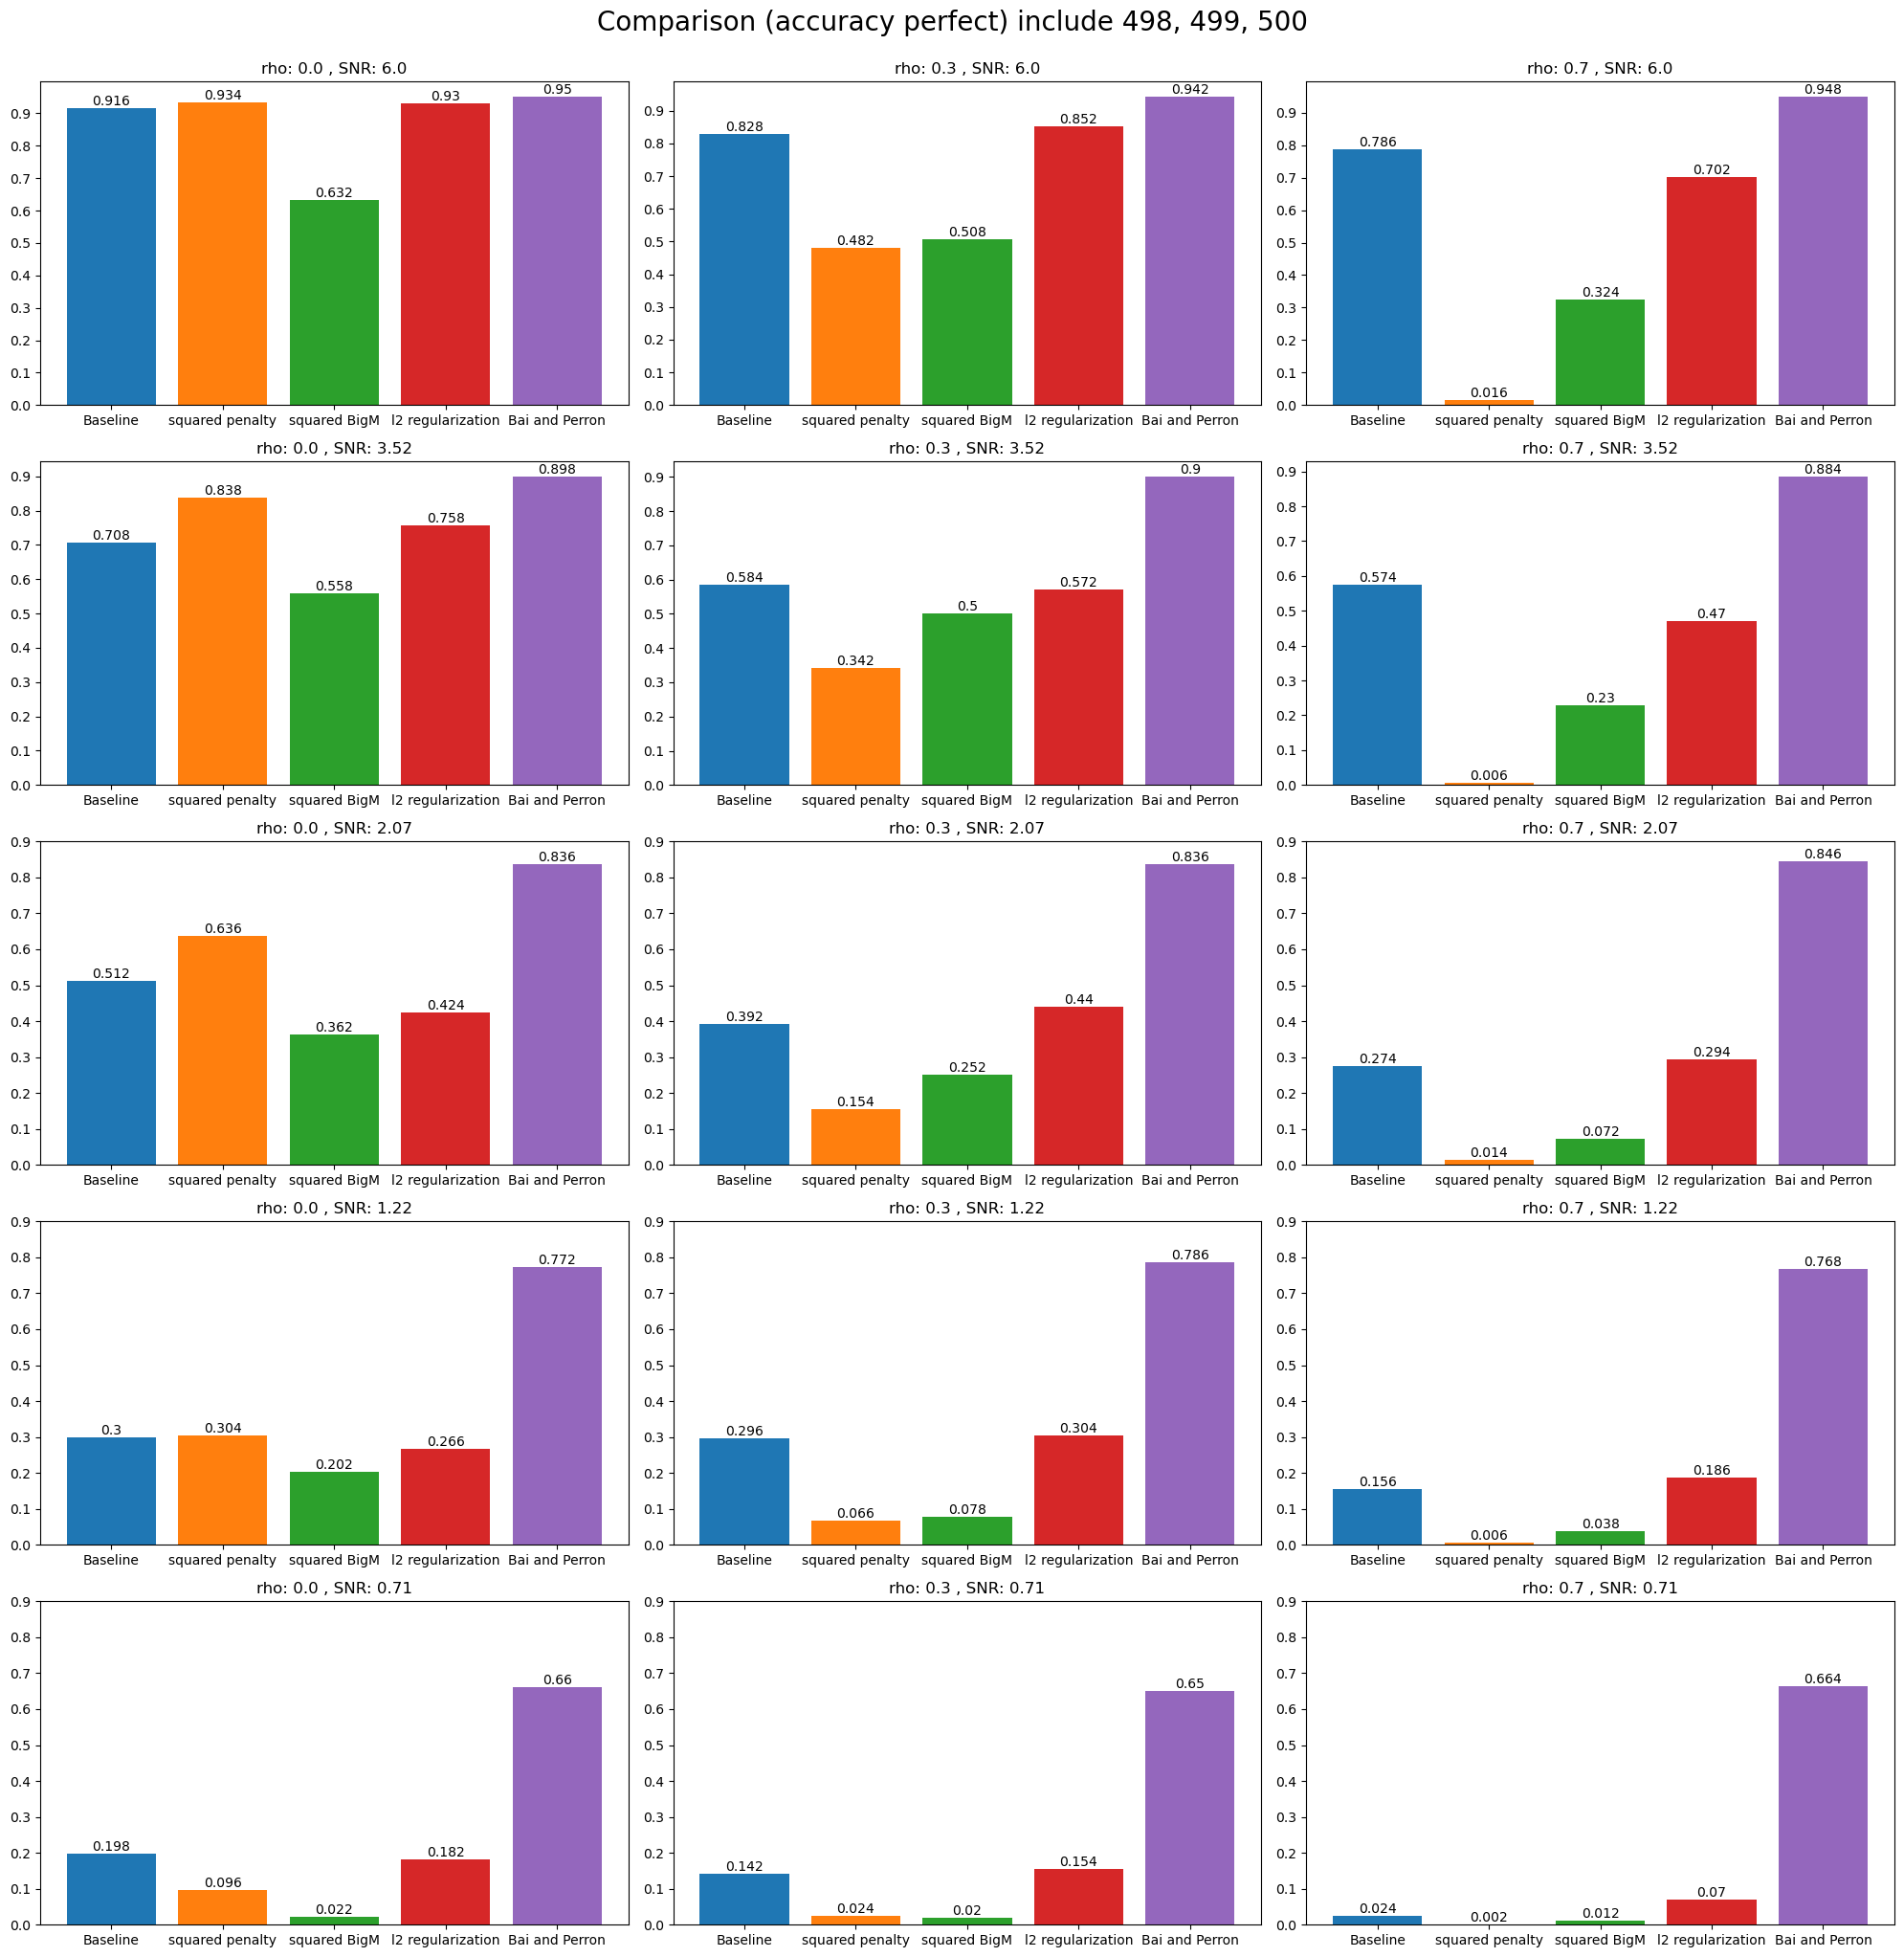

In [26]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_perfect"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy perfect) include 498, 499, 500", fontsize=20).set_y(1.02)
plt.show()

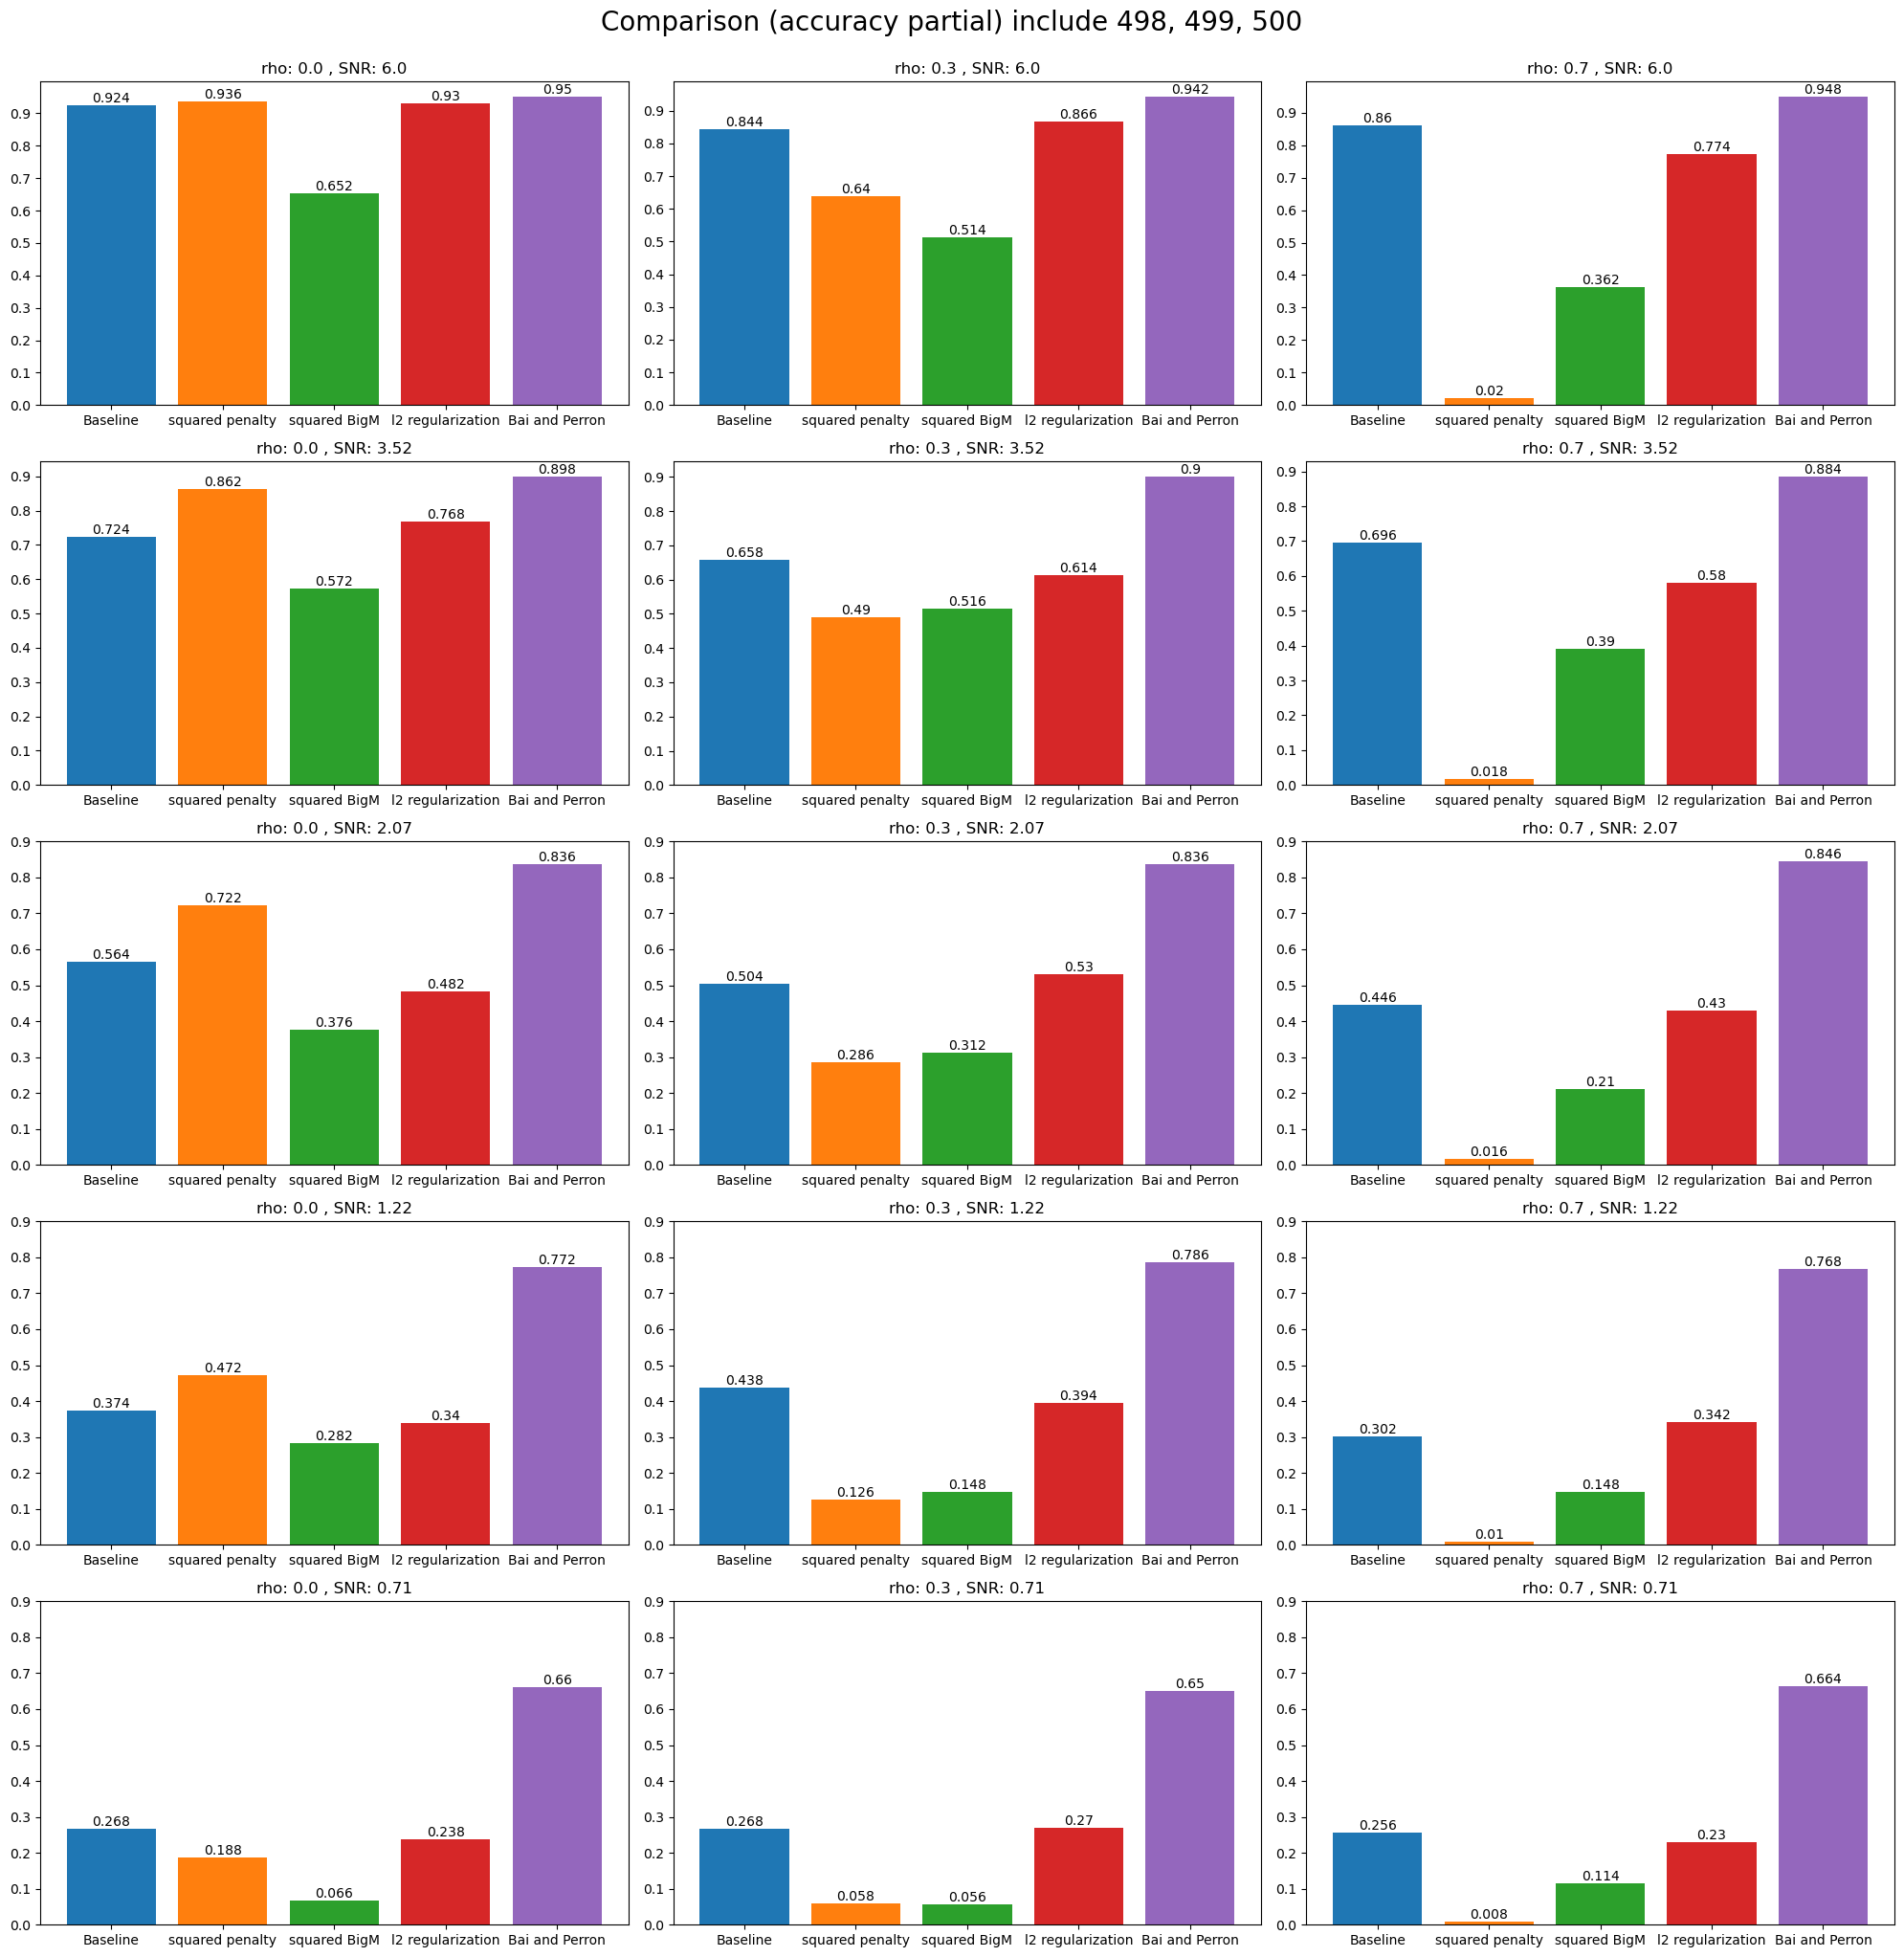

In [25]:
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

for g, ax in zip(group_list, ax.ravel()):
    p = ax.bar(df_plot.loc[df_plot["group"] == g, "method"],
         df_plot.loc[df_plot["group"] == g, "accuracy_partial"], color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"])
    ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    ax.bar_label(p, label_type = "edge")
    ax.set_title(g)
    

fig.tight_layout()
fig.suptitle("Comparison (accuracy partial) include 498, 499, 500", fontsize=20).set_y(1.02)
plt.show()